In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("/home/isaacp/repos/EvMatsim/contribs/rlev/i-15-results/i-15-1-percent-early-fail/initialoutput/output/ITERS/it.0/0.countscompare.txt", sep="\t")

In [3]:
df.head()

,Link Id,Count Station Id,Hour,MATSIM volumes,Count volumes,Relative Error,Normalized Relative Error,GEH
0,1000,23103138,1,15,173,-0.913,0.913,16.296
1,1000,23103138,2,30,90,-0.667,0.667,7.746
2,1000,23103138,3,45,51,-0.118,0.118,0.866
3,1000,23103138,4,35,40,-0.125,0.125,0.816
4,1000,23103138,5,20,62,-0.677,0.677,6.559


In [4]:
minidx = np.argmin(np.abs(df['Relative Error'].values)) 
df.iloc[minidx]

Link Id                       2076.0
Count Station Id             99537.0
Hour                             8.0
MATSIM volumes                 310.0
Count volumes                  310.0
Relative Error                   0.0
Normalized Relative Error        0.0
GEH                              0.0
Name: 2143, dtype: float64

In [9]:
maxidx = np.argmax(np.abs(df['Relative Error'].values)) 
df.iloc[maxidx]

Link Id                      4.220000e+02
Count Station Id             2.310394e+07
Hour                         2.400000e+01
MATSIM volumes               2.000000e+02
Count volumes                1.900000e+01
Relative Error               9.526000e+00
Normalized Relative Error    9.050000e-01
GEH                          1.729700e+01
Name: 2855, dtype: float64

In [5]:
optimized_hour_sum = df.groupby("Hour")["Count volumes"].sum()

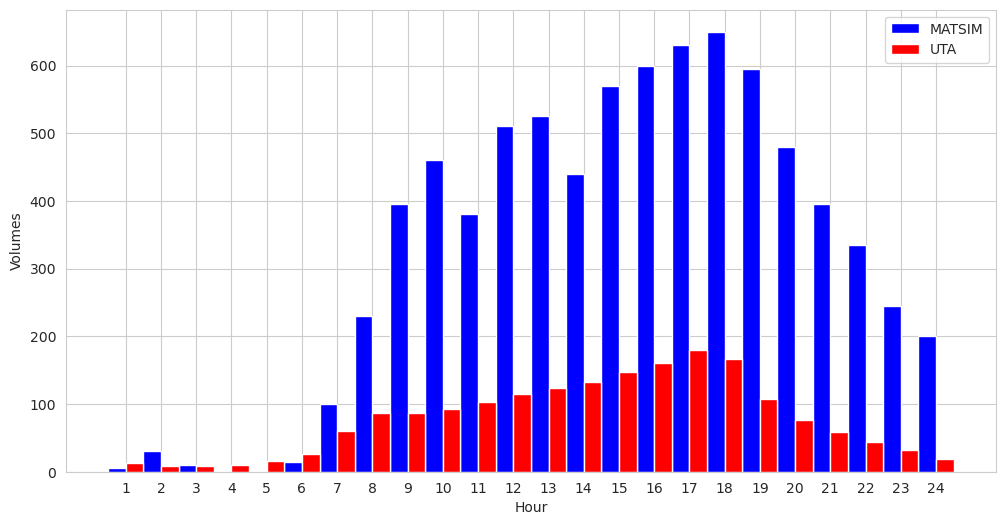

In [21]:
link = 422
df_link = df[df["Link Id"] == link]

unique_hours = pd.unique(df_link["Hour"])
bar_width = 0.5  # Width of each bar

# X positions for each set of bars
r1 = np.arange(len(unique_hours))
r2 = [x + bar_width for x in r1]


plt.figure(figsize=(12, 6))

plt.bar(
    r1, df_link["MATSIM volumes"], color="blue", width=bar_width, label="MATSIM"
)
plt.bar(
    r2, df_link["Count volumes"], color="red", width=bar_width, label="UTA"
)

# Plot MATSIM volumes histogram

# Labels, title, and legend
plt.xlabel("Hour")
plt.ylabel("Volumes")
plt.xticks([r + (bar_width / 2) for r in range(len(unique_hours))], unique_hours)
plt.legend()

plt.savefig("./worst_flow.pdf")